#1. Data Preparation

In [1]:
# Seed value
seed_value= 1

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
seed_value += 1

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
seed_value += 1

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
seed_value += 1

# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

In [2]:
%run parseData.ipynb
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt #ploting graphs
import seaborn as sns #ploting histogram
from keras.utils import to_categorical
from sklearn import preprocessing

In [3]:
path = "./data/"
all_data = read_data(path)

df = pd.DataFrame(all_data)

df

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,0.0,1.0,90.0,0.0,90.0,90.0,0.0,90.0,122.989521,5.031775,...,-67.582787,-125.367848,-72.437172,-50.852973,-96.587422,-79.767570,-67.930081,-70.781021,-70.997175,-87.361629
1,2.0,0.0,90.0,0.0,90.0,90.0,0.0,90.0,135.335277,22.762292,...,-102.868148,83.136421,15.529929,90.343455,78.789987,5.173831,90.525847,72.386893,-4.364089,104.625646
2,2.0,0.0,90.0,0.0,90.0,90.0,0.0,90.0,141.891296,28.615349,...,-109.162265,82.213256,36.904574,89.425871,76.610167,22.542002,89.209393,73.080910,-3.183434,110.232384
3,2.0,1.0,90.0,0.0,90.0,90.0,0.0,90.0,141.153613,28.042486,...,-105.087837,83.791429,7.936759,89.145902,79.618323,-2.325866,93.411176,73.203217,-12.320351,108.900585
4,0.0,1.0,90.0,0.0,90.0,90.0,0.0,90.0,123.134389,5.315064,...,-66.555146,-124.152353,-72.004125,-51.785051,-94.026793,-73.783497,-70.421552,-73.377815,-68.075547,-86.260239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2.0,1.0,90.0,0.0,90.0,90.0,0.0,90.0,136.117148,23.558528,...,-98.328479,83.881257,8.030162,91.208625,80.051306,-6.781338,95.508604,74.032483,-20.728024,115.463379
268,1.0,0.0,90.0,0.0,90.0,90.0,0.0,90.0,127.991088,13.598609,...,-84.058191,-105.174249,-47.854197,-70.212570,-90.002308,-53.102226,-71.775582,-78.800412,-47.744039,-73.490989
269,1.0,0.0,90.0,0.0,90.0,90.0,0.0,90.0,128.619080,14.520708,...,-85.925970,-103.907414,-44.440241,-72.821098,-89.280597,-49.272736,-72.529674,-77.843477,-45.906435,-73.415761
270,2.0,0.0,90.0,0.0,90.0,90.0,0.0,90.0,136.420157,23.859257,...,-98.127984,84.143438,10.057336,89.546770,79.712891,-3.979332,91.587358,73.134629,-14.307162,108.203424


In [118]:
augmented_data = np.array(all_data)

for i in range(augmented_data.shape[0]):
    for j in range(7, 72):
        random.seed(i * j)
        random_v = random.random()
        augmented_data[i][j] = augmented_data[i][j] + (-1.0 + (random.random() * (1.0 + 1.0)))
        # print(augmented_data[i][j])
        # print(all_data[i][j])

#random_rot, random_rot.shape, augmented_data[:, 2:]
#full_data = np.array(all_data)
full_data = np.concatenate((all_data, augmented_data), axis=0)

# for item in augmented_data:
#     full_data = np.insert(full_data, 0, item)

#full_data.shape

In [120]:
#data_temp = np.array(df)
labels = full_data[:, :1]

In [121]:
data = full_data[:, 2:]

data.shape
#data = df.reindex(columns=df.columns[2:])

#scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
#scaled = scaler.fit_transform([[x] for x in data])

#scaled


(544, 72)

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state= 2, stratify=labels)

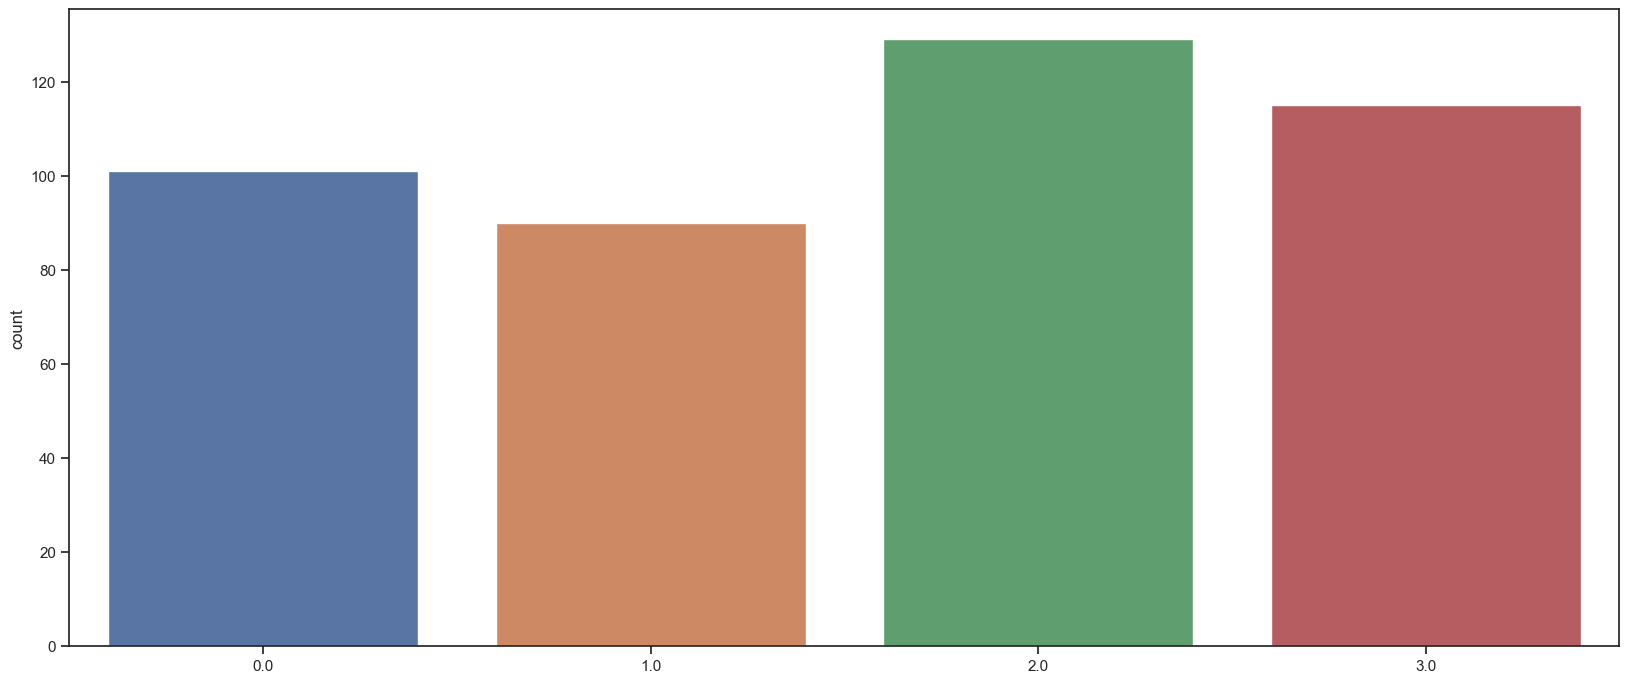

In [123]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.set_style("ticks")
_ = sns.countplot(x=y_train.reshape(-1))

In [124]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("")
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (435, 72)
y_train shape: (435, 1)

X_test shape: (109, 72)
y_test shape: (109, 1)


Changing labels shape to categorical: 

In [125]:
y_train[0]

array([0.])

In [126]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [127]:
y_train[0]

array([1., 0., 0., 0.], dtype=float32)

In [128]:
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

y_train shape: (435, 4)
y_test shape: (109, 4)


In [129]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [130]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [131]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (435, 72, 1)
X_test shape: (109, 72, 1)


In [132]:
class_mapping = ['thumbs_up','thumbs_down','ok','victory']
num_classes = 4

#2. Creating and training CNN

In [133]:
import keras
from keras import layers  
from keras import models
from keras import callbacks
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [134]:
def create_1D_model():
  model = models.Sequential()

  model.add(layers.Conv1D(32, 3, input_shape=X_train.shape[1:3], activation='relu', ))
  model.add(layers.Conv1D(16, 1, activation='relu', ))
  model.add(layers.Dropout(0.2))
  model.add(layers.MaxPooling1D(pool_size=2))

  model.add(layers.Flatten())

  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(num_classes, activation='softmax'))

  return model

In [135]:
model = create_1D_model()
model.compile(optimizer=keras.optimizers.SGD(),loss='categorical_crossentropy',metrics=['accuracy', 'Precision', 'Recall'])

In [136]:
MCP = keras.callbacks.ModelCheckpoint('./results/' + 'Best_model.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [137]:
history = model.fit(X_train, y_train, batch_size=32,epochs=100, validation_data=(X_test, y_test),callbacks=[MCP,ES,RLP],verbose=1)

Epoch 1/100
 1/14 [=>............................] - ETA: 5s - loss: 13.1223 - accuracy: 0.4062 - precision: 0.4062 - recall: 0.4062
Epoch 1: val_accuracy improved from -inf to 0.54128, saving model to ./results\Best_model.h5
14/14 [==============================] - 1s 22ms/step - loss: 20.4216 - accuracy: 0.2989 - precision: 0.3631 - recall: 0.1494 - val_loss: 1.1534 - val_accuracy: 0.5413 - val_precision: 1.0000 - val_recall: 0.0183 - lr: 0.0100
Epoch 2/100
 1/14 [=>............................] - ETA: 0s - loss: 1.1193 - accuracy: 0.4062 - precision: 0.5385 - recall: 0.2188
Epoch 2: val_accuracy improved from 0.54128 to 0.64220, saving model to ./results\Best_model.h5
14/14 [==============================] - 0s 7ms/step - loss: 1.1495 - accuracy: 0.5425 - precision: 0.5556 - recall: 0.1724 - val_loss: 1.0586 - val_accuracy: 0.6422 - val_precision: 0.6304 - val_recall: 0.2661 - lr: 0.0100
Epoch 3/100
 1/14 [=>............................] - ETA: 0s - loss: 1.0074 - accuracy: 0.5938 -

#3. CNN evaluation

In [138]:
model.evaluate(X_test, y_test, verbose=2)

4/4 - 0s - loss: 0.1273 - accuracy: 0.9725 - precision: 0.9725 - recall: 0.9725 - 23ms/epoch - 6ms/step


[0.12730319797992706,
 0.9724770784378052,
 0.9724770784378052,
 0.9724770784378052]

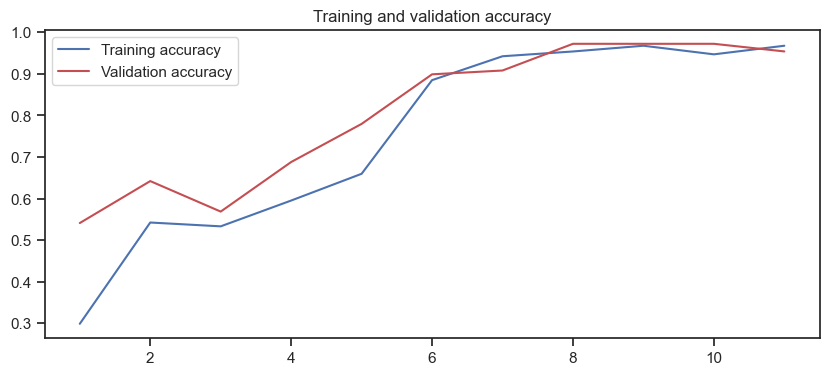

<Figure size 2000x827 with 0 Axes>

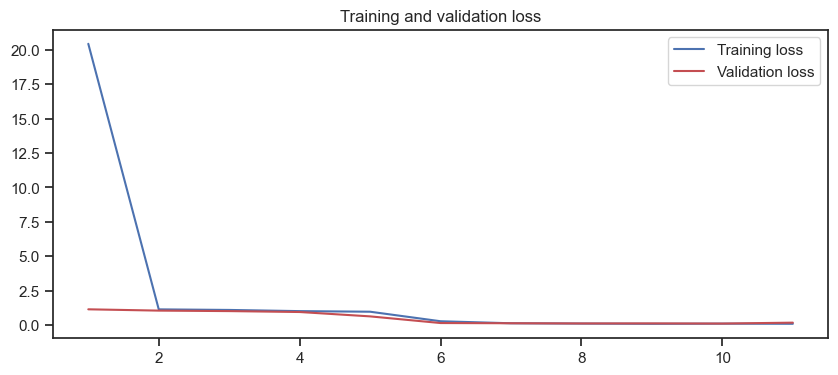

In [139]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 4))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend() 
plt.savefig('Training and validation accuracy.png',dpi=200)
plt.figure()

plt.figure(figsize=(10, 4))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [140]:
predictions = np.argmax(model.predict(X_test), axis=1)
actual = np.argmax(y_test, axis=1)

4/4 [==============================] - 0s 2ms/step


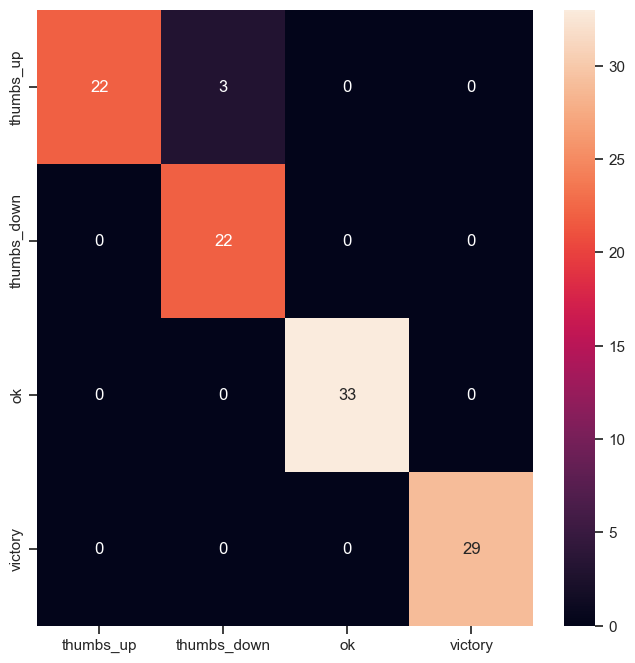

In [141]:
plt.figure(figsize=(8, 8))
cm = confusion_matrix(actual, predictions)
g = sns.heatmap(cm, annot=True, fmt='.0f')
g.set_xticklabels(class_mapping)
g.set_yticklabels(class_mapping)
plt.show()

In [142]:
y_test_temp = np.argmax(y_test, axis=1)
print(classification_report(y_test_temp, predictions))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        25
           1       0.88      1.00      0.94        22
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        29

    accuracy                           0.97       109
   macro avg       0.97      0.97      0.97       109
weighted avg       0.98      0.97      0.97       109

